<a href="https://colab.research.google.com/github/hmchakiri/Project_audio/blob/main/LAB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projet :**
Auteur: Haytham Chakiri (A00189444)

## Introduction

La plateforme Colab de Google permet de programmer sans à avoir télecharger aucun logiciel sur votre ordinateur. De ce fait, on peut gagner le temps et d'éviter l'incompatibilité.

Sur python, chaque code se divise en trois section :

* Importation de la librairie
* Code à excecuter 
* les fonctions

Durant ce laboratoire, on va utiliser deux librairie:

* Matplotlib  [(Documentation)]()
* Numpy [(Documentation)](https://numpy.org/doc/stable/)

##**Bibliotéque utilisé**

In [1]:
#@title  { run: "auto" }
!pip install SpeechRecognition

from matplotlib.pylab import *
import matplotlib.pylab as plt
import sympy as sp
from scipy.fft import fft, ifft,fftfreq
import numpy as np
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import blackman, hann, hamming
from scipy.fft import fft, fftfreq, fftshift
import numpy as np
from scipy.fft import ifftn
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import speech_recognition as sr

from IPython.display import Audio

     |████████████████████████████████| 32.8 MB 31 kB/s 


##  **Laboratoire 1 : Transformé de fourrier**


---


### I - Géneration de signal

  Le code suivant permet de generer un signal sinusoïdal avec une amplitude et fréquence prédefini.  Je vous invite à changer les variable à la droite de la fenêtre puis l'éxecuter.

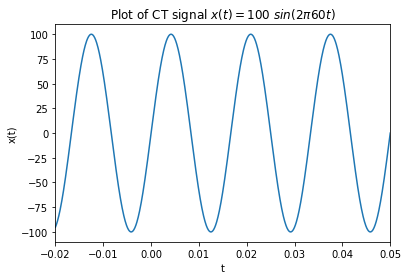

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Amplitude = 100 #@param {type:"integer"}
Fréquence = 60 #@param {type:"integer"}


amp = Amplitude; # Amplitude du signal
frq = Fréquence; # Fréquence du signal


t = np.linspace(-0.02, 0.05, 1000) # Temps d'échantillage avec 


plt.plot(t, amp * np.sin(2*np.pi*frq*t));
plt.xlabel('t');
plt.ylabel('x(t)');
plt.title(r'Plot of CT signal $x(t)='+str(amp)+' \ sin(2\pi '+str(frq)+' t)$');
plt.xlim([-0.02, 0.05]);
plt.show()


Il est demandé dans cette partie de recopier dans la section suivante et changer le code pour avoir une amplitude de 110 avec une fréquence de 60Hz. Aprés avoir fait les modification nécessaire, veuillez excecuter le code en cliquant sur le bouton "Play" et copie la figure dans le fichier word.

Après l’analyse du code python pour générer ce signal, trouve la fonction utiliser pour l’affichage du signal.



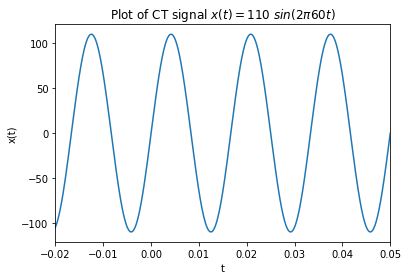

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Amplitude =  110#@param {type:"integer", run:"auto"}
Fréquence =  60#@param {type:"integer"}


amp = Amplitude; # Amplitude du signal
frq = Fréquence; # Fréquence du signal


t = np.linspace(-0.02, 0.05, 1000) # Temps d'échantillage avec 


plt.plot(t, amp * np.sin(2*np.pi*frq*t));
plt.xlabel('t');
plt.ylabel('x(t)');
plt.title(r'Plot of CT signal $x(t)='+str(amp)+' \ sin(2\pi '+str(frq)+' t)$');
plt.xlim([-0.02, 0.05]);
plt.show()


### II - Echantionnage de signal

 Le traitement numérique des signaux se fait sur des valeurs discrètes: il n'est pas possible de traiter par ordinateur des signaux à temps continu. Par souci de simplicité, on échantillonne les signaux à un intervale régulier. Par exemple, on échantionne chaque 1ms le signal et on le compare avec la valeur maximum possible. 

Exécute le code avec le nombre d’échantillon (nb) 10, 50 et 100.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


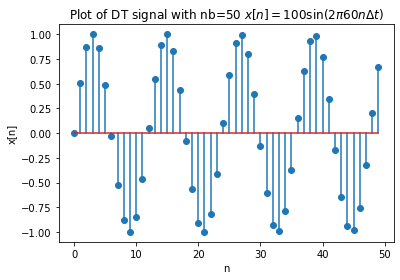

In [4]:
import numpy as np
import matplotlib.pyplot as plt
nb = 50 #@param {type:"slider", min:10, max:100, step:5 }
n = np.arange(nb);
dt = 0.07/nb
x = np.sin(2 * np.pi * 60 * n * dt)
plt.xlabel('n');
plt.ylabel('x[n]');
plt.title(r'Plot of DT signal with nb='+str(nb)+' $x[n] = '+str(100)+' \sin(2\pi '+str(60)+'  n \Delta t)$');
plt.stem(n, x);



### III - Signal de forme complexe (a + ib)

Le signal peut être representé aussi par la forme complexe de la maniére suivante : $ x(t)= Ae^{j(2\pi f t +\Phi)} \Leftrightarrow x(t)= Acos(2\pi f t +\Phi)$.

La forme exponentielle est souvent plus utile lors de calculs mathéematique impliquant les signaux.




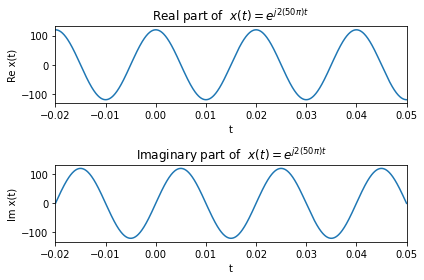

In [5]:
import numpy as np
import matplotlib.pyplot as plt

A   = 120
f   = 50
phi = 0

t = np.linspace(-0.02, 0.05, 1000)
plt.subplot(2,1,1); plt.plot(t, A*np.exp(2j*np.pi*f*t+phi).real );
plt.xlabel('t');
plt.ylabel('Re x(t)');
plt.title(r'Real part of  $x(t)=e^{j 2('+str(f) +'\pi) t}$');
plt.xlim([-0.02, 0.05]);
plt.subplot(2,1,2); plt.plot(t, A*np.exp(2j*np.pi*f*t+phi).imag );
plt.xlabel('t');
plt.ylabel('Im x(t)');
plt.title(r'Imaginary part of  $x(t)=e^{j 2 ('+str(f) +' \pi) t}$');
plt.xlim([-0.02, 0.05]);
plt.tight_layout()
plt.show()


### IV - Signal triangulaire de forme complexe (a + ib) 

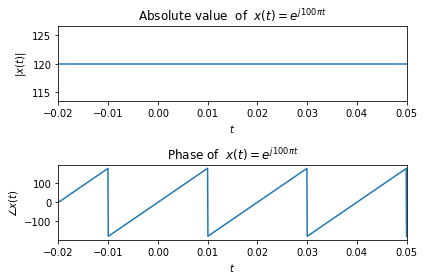

In [6]:
import numpy as np
import matplotlib.pyplot as plt

A   = 120
f   = 50
phi = 0

t = np.linspace(-0.02, 0.05, 1000)
plt.subplot(2,1,1); plt.plot(t, np.abs(A*np.exp(2j*np.pi*f*t+phi)) );
plt.xlabel(r'$t$');
plt.ylabel(r'$|x(t)|$');
plt.title(r'Absolute value  of  $x(t)=e^{j 100 \pi t}$');
plt.xlim([-0.02, 0.05]);
plt.subplot(2,1,2); plt.plot(t, np.angle(A*np.exp(2j*np.pi*f*t+phi))*360/(2*np.pi) );
plt.xlabel('$t$');
plt.ylabel(r'$\angle x(t)$');
plt.title(r'Phase of  $x(t)=e^{j 100 \pi t}$');
plt.xlim([-0.02, 0.05]);
plt.tight_layout()
plt.show()


### V - Pulsation

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


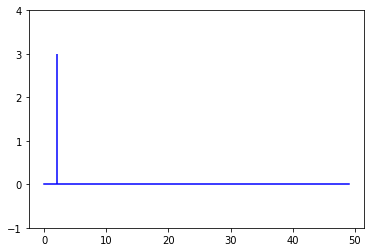

In [7]:
import numpy as np
import matplotlib.pyplot as plt
x = np.zeros_like(n);
print(x)
x[2]=3;
plt.vlines(n,0,x,'b');
plt.ylim(-1,4);
plt.plot(n,0*n, 'b');
plt.show();


##  **Laboratoire 2 : Transformé de fourrier**


---








### **I - Introduction**

*   La transformé de fourrier aide à décomposer un signal complex en multitude de signaux sinusoidaux dans le domaine fréquentiel.
*   Cette transformé sert essentiellement dans le domaine de traitement de signal.

### **II - Géneration d'un signal avec une période variable**

Durant ce laboratoire, on va utiliser les connaissance acquise durant le laboratoire dernier pour generer 4 signaux sinuisidal avec des périodes différente.

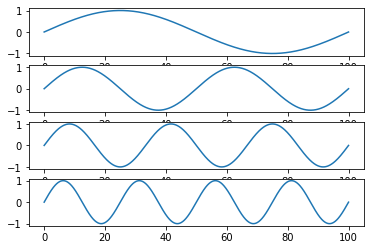

In [5]:
T0 = 100                           # Déterminer la période de départ  
t = linspace(0,T0,1000)           
for k in range(1,5):              # Affichage de 4 signal en variant la période (1f, 2f, 3f et 4f)
    subplot(4,1,k)
    plot(t, sin(2*k*pi*t / T0))
show()

### **III - Géneration de la fonction step**



Piecewise((1, T0/2 >= Mod(t, T0)), (0, True))


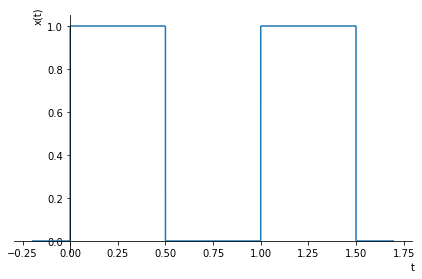

In [6]:

t, T0 = sp.symbols("t, T0")
x = sp.Piecewise(
    (1, t % T0<=T0/2),
    (0, True))
print(x)
sp.plot(x.subs(T0,1), (t,-.2, 1.7), xlabel="t", ylabel="x(t)", line_width=3);
plt.show()


### **IV - Application de la transformé de fourrier rapide.**

In [7]:

x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
print("x(t)", end=": ")
print(x)
print(' ')
y = fft(x)
print("y(f)=TF[x(t)]", end=": ")
print(y)
print(' ')
yinv = ifft(y)
print("x'(t)=TF-1[y(f)]", end=": ")
print(yinv)
#sum
print(' ')
print("sum for x(t)=",np.sum(x))
print(' ')
print("sum for y(f)=",np.sum(y))
# compute the sum of |x|^2


x(t): [ 1.   2.   1.  -1.   1.5]
 
y(f)=TF[x(t)]: [ 4.5       -0.j          2.08155948-1.65109876j -1.83155948+1.60822041j
 -1.83155948-1.60822041j  2.08155948+1.65109876j]
 
x'(t)=TF-1[y(f)]: [ 1. +0.j  2. +0.j  1. +0.j -1. +0.j  1.5+0.j]
 
sum for x(t)= 4.5
 
sum for y(f)= (5+0j)


### **V - Géneration de la fonction step**

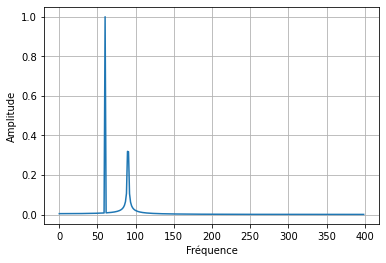

In [9]:

#@title  { run: "auto" }

# Number of sample points
N = 600
f1 = 60 #@param {type:"slider", min:0, max:100, step:10}
f2 = 90 #@param {type:"slider", min:0, max:100, step:10}
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(f1 * 2.0*np.pi*x) + 0.5*np.sin(f2 * 2.0*np.pi*x)
yf = fft(y)
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.xlabel("Fréquence")
plt.ylabel("Amplitude")

plt.grid()
plt.show()

### **VI - Fenêtrage de fonction**

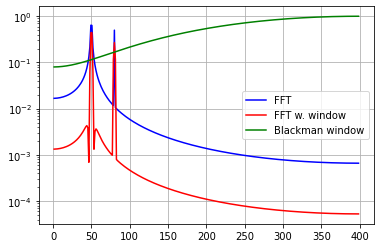

In [ ]:

# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)

w = hann(N) #@param ["blackman(N)", "hann(N)", "hamming(N)"] {type:"raw", "run":"auto"}
ywf = fft(y*w)
xf = fftfreq(N, T)[:N//2]
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(yf[1:N//2]), '-b')
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(ywf[1:N//2]), '-r')
plt.semilogy(xf[1:N//2], np.abs(w[1:N//2]), '-g')
plt.legend(['FFT', 'FFT w. window', 'Blackman window'])
plt.grid()
plt.show()




```
# This is formatted as code
```

6_FFT_twoExponentials

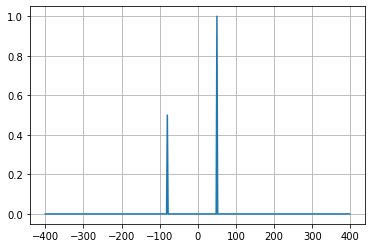

In [11]:

N = 400
T = 1.0 / 800.0

x = np.linspace(0.0, N*T, N, endpoint=False)

y = np.exp(50.0 * 1.j * 2.0*np.pi*x) + 0.5*np.exp(-80.0 * 1.j * 2.0*np.pi*x)
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)

plt.plot(xf, 1.0/N * np.abs(yplot))
plt.grid()
plt.show()


### VII - Transformation de fourrier rapide en 2-D

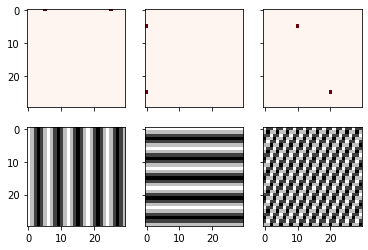

In [13]:

N = 30
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col', sharey='row')
xf = np.zeros((N,N))
xf[0, 5] = 1
xf[0, N-5] = 1
#To do 1: add this instruction xf = fftshift(xf)
Z = ifftn(xf)
#To do 1: add this instruction Z = fftshift(Z)
ax1.imshow(xf, cmap=cm.Reds)
ax4.imshow(np.real(Z), cmap=cm.gray)
xf = np.zeros((N, N))
xf[5, 0] = 1
xf[N-5, 0] = 1
#To do 2: add this instruction xf = fftshift(xf)
Z = ifftn(xf)
#To do 2: add this instruction Z = fftshift(Z)
ax2.imshow(xf, cmap=cm.Reds)
ax5.imshow(np.real(Z), cmap=cm.gray)
xf = np.zeros((N, N))
xf[5, 10] = 1
xf[N-5, N-10] = 1
#To do 3: add this instruction xf = fftshift(xf)
Z = ifftn(xf)
#To do 3: add this instruction Z = fftshift(Z)
ax3.imshow(xf, cmap=cm.Reds)
ax6.imshow(np.real(Z), cmap=cm.gray)
plt.show()


## **Laboratoire 3 :**

##  **Laboratoire 4 : Reconnaissance vocale**


### **I - Téleversement des fichiers audio**

In [ ]:
get_ipython().magic('reset -sf') 


from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

### II - 

In [ ]:
#@title  { run: "auto" }


def upload_Custom ():
  name = ""
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
    name=fn
  return name
    
def proccess_audio(audio):
  display(Audio(audio))
  with sr.AudioFile(audio) as source:
    audio_text = r.listen(source)
# recoginize_() method will throw a request error if the API is unreachable, hence using exception handling
    try: 
        # using google speech recognition
        text = r.recognize_google(audio_text)
        print(f'Résultat de la reconnaissance vocale : {text}')
    except:
         print('Un probléme est survenu lors de la roconnaissance vocale.')


# Initialize recognizer class (for recognizing the speech)
r = sr.Recognizer()

# Reading Audio file as source
# listening the audio file and store in audio_text variable

audio = "Custom" #@param ["'all-the-way.wav'", "byebye.wav", "dontknow.wav", "excuseme.wav","follow.wav", "hello.wav", "hereigo.wav", "maybe.wav", "no.wav", "oops.wav", "ouch.wav" ,"thankyou.wav", "yes.wav", "Custom"] {"run":"auto"}

if (audio == "Custom"):
  audio = str(upload_Custom())
  print(audio)
  proccess_audio(audio)
else :
  proccess_audio(audio)